In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.stats import rankdata

In [2]:
data = pd.read_csv('../main/log/mut_step_real.csv', names=["algo", "mut_step","experiment_id",  "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

In [3]:
data.head()

,algo,mut_step,experiment_id,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,log
0,SLIM*1SIG,"(0, 62)",ba30cd40-4352-11ef-81f6-049226d8b1cb,yatch,0,0,15.497589,0.075018,1490.0,14.884969,7,1
1,SLIM*1SIG,"(0, 62)",ba30cd40-4352-11ef-81f6-049226d8b1cb,yatch,0,1,14.727017,0.080019,1968.0,12.672737,11,1
2,SLIM*1SIG,"(0, 62)",ba30cd40-4352-11ef-81f6-049226d8b1cb,yatch,0,2,14.727017,0.038010,1488.0,12.672737,11,1
3,SLIM*1SIG,"(0, 62)",ba30cd40-4352-11ef-81f6-049226d8b1cb,yatch,0,3,11.688514,0.069017,2076.0,10.872585,15,1
4,SLIM*1SIG,"(0, 62)",ba30cd40-4352-11ef-81f6-049226d8b1cb,yatch,0,4,11.688514,0.034019,1666.0,10.872585,15,1


In [4]:
data.dataset.unique()

array(['yatch', 'airfoil', 'concrete_slump', 'concrete_strength', 'ppb',
       'bioav', 'ld50'], dtype=object)

In [5]:
# data['output_scale'] = data.dataset.apply(lambda x: x.split('_')[-1])
# data['input_scale'] = data.dataset.apply(lambda x: x.split('_')[-2])
# data['dataset'] = data.dataset.apply(lambda x: x.split('_')[0])
data['algo'] = data['algo'] + '_' + data['mut_step']

In [6]:
data_info = {"yatch" : (0, 62),
                   "airfoil" : (103, 141),
                   "concrete_slump" : (0, 30),
                   "concrete_strength" : (2.3, 83),
                   "ppb": (0.5, 100),
                    "bioav" : (0.4, 100),
                   "ld50" : (0.25, 89000)}

In [7]:
algorithms = ['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']

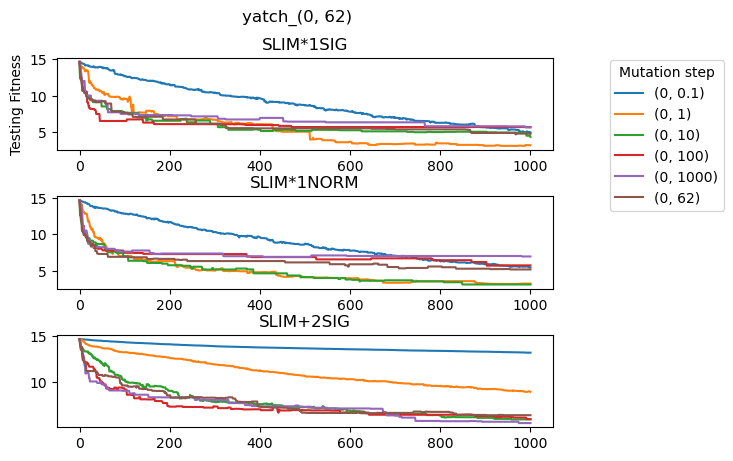

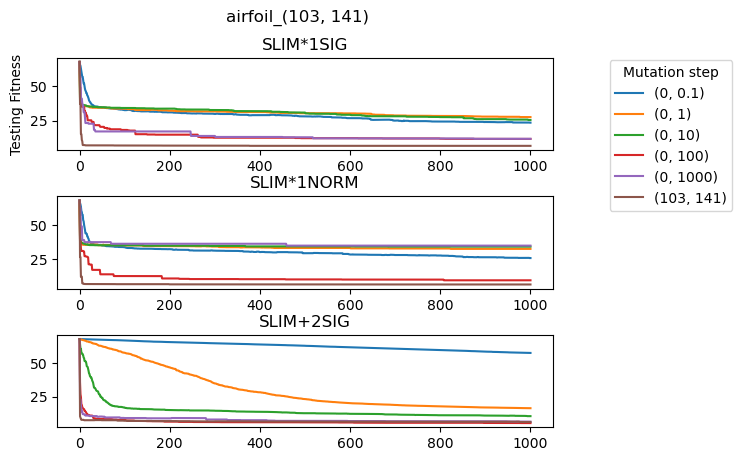

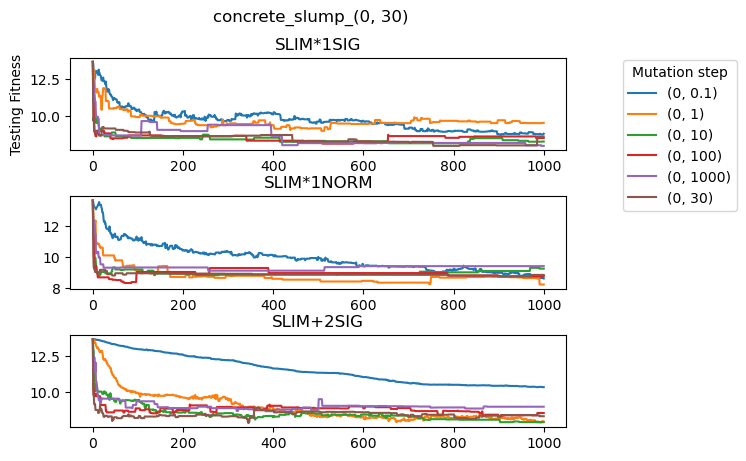

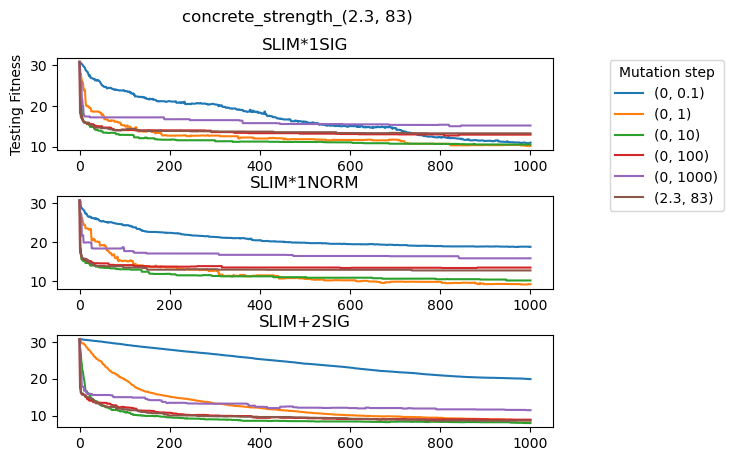

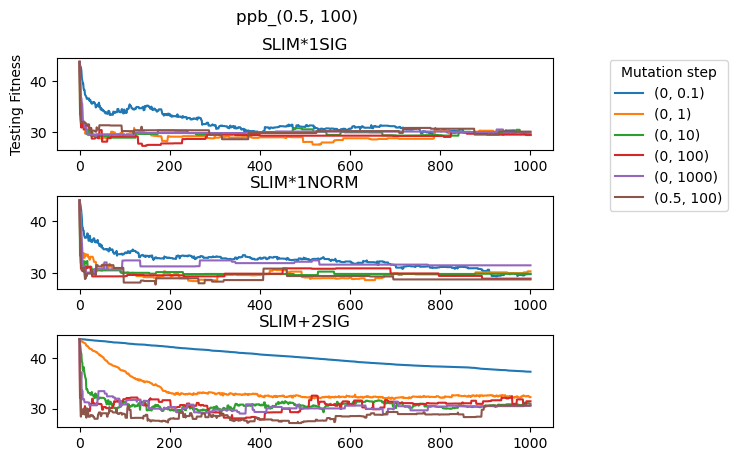

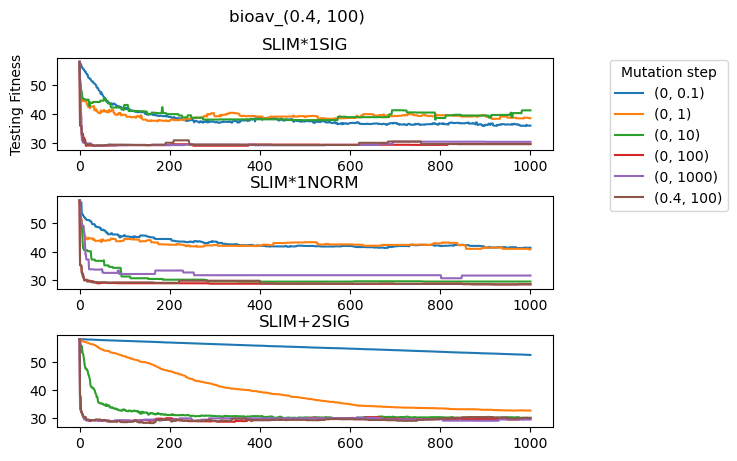

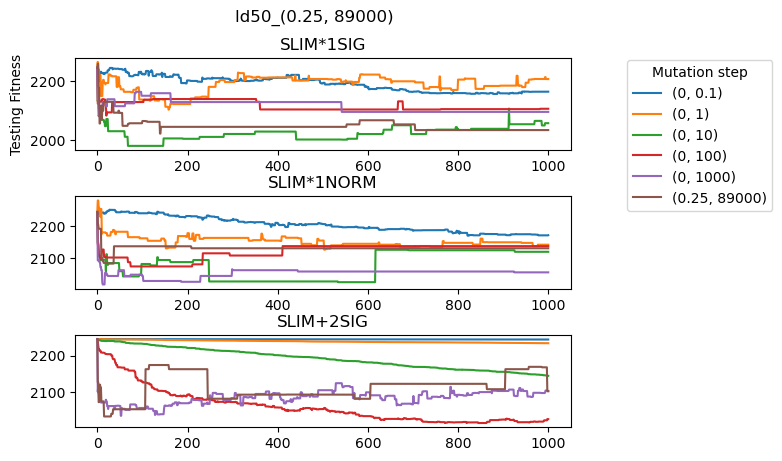

In [37]:
for dataset in data['dataset'].unique():
    
    grouped = data.query("dataset == @dataset") \
    [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']].groupby(['generation', 'algo']).median()
    
    if not grouped.values.shape[0] == 0:
    
        grouped.reset_index(inplace = True)

        
        gs = gridspec.GridSpec(3, 1)
        gs.update( wspace=0.6, hspace =  0.5)
        pl.figure()

        plt.suptitle(dataset + '_' + str(data_info[dataset]))

        for algo_ in list(filter(lambda x: algorithms[0] in x, grouped.algo.unique())):
            ax1 = pl.subplot(gs[0, 0]) 
            pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
            ax1.set_ylabel('Testing Fitness')
            ax1.set_title(algorithms[0])
            ax1.legend(bbox_to_anchor=(1.1, 1.05), title = 'Mutation step')
            
        for algo_ in list(filter(lambda x: algorithms[1] in x, grouped.algo.unique())):
            ax2 = pl.subplot(gs[1, 0]) 
            pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax2.set_ylabel('Testing Fitness')
            ax2.set_title(algorithms[1])
            

        for algo_ in list(filter(lambda x: algorithms[2] in x, grouped.algo.unique())):
            ax3 = pl.subplot(gs[2, 0]) 
            pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax3.set_ylabel('Testing Fitness')
            ax3.set_title(algorithms[2])
            

        plt.show()

In [35]:
list(filter(lambda x: algorithm in x, grouped.algo.unique()))

['SLIM+2SIG_(0, 0.1)',
 'SLIM+2SIG_(0, 10)',
 'SLIM+2SIG_(0, 100)',
 'SLIM+2SIG_(0, 1000)',
 'SLIM+2SIG_(0.25, 89000)']

In [16]:
list(filter(lambda x: algorithm in x, grouped.algo.unique()))

['SLIM+2SIG_(0, 0.1)',
 'SLIM+2SIG_(0, 1)',
 'SLIM+2SIG_(0, 10)',
 'SLIM+2SIG_(0, 100)',
 'SLIM+2SIG_(0, 1000)',
 'SLIM+2SIG_(0.25, 89000)']

In [19]:
grouped = data.query("dataset == @dataset and generation == 1000") \
        [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']]

In [23]:
grouped

,generation,training_fitness,test_fitness,elite_size,algo
901900,1000,2019.370483,2057.966309,7,"SLIM*1SIG_(0.25, 89000)"
902901,1000,2062.678711,1802.571289,7,"SLIM*1SIG_(0.25, 89000)"
903902,1000,2060.443115,2008.534058,7,"SLIM*1SIG_(0.25, 89000)"
904903,1000,2015.765991,1998.510132,7,"SLIM*1SIG_(0.25, 89000)"
905904,1000,1964.170410,2281.399658,7,"SLIM*1SIG_(0.25, 89000)"
...,...,...,...,...,...
1257255,1000,2087.198486,2431.494385,627,"SLIM+2SIG_(0, 1)"
1258256,1000,2472.206299,2161.210938,800,"SLIM+2SIG_(0, 1)"
1259257,1000,2385.274902,2236.869385,829,"SLIM+2SIG_(0, 1)"
1260258,1000,2354.610840,2268.611328,768,"SLIM+2SIG_(0, 1)"


In [26]:
[grouped.query("algo == @algo_")['test_fitness'].values[0] for algo_ in list(filter(lambda x: algorithm in x, grouped.algo.unique()))]

[2026.3983154296875,
 2152.050537109375,
 2057.14794921875,
 2240.411865234375,
 2090.43505859375,
 2231.211669921875]

In [27]:
data.seed.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [33]:
results = []
for algorithm in algorithms:
    for dataset in data['dataset'].unique():
        data_rank = []
        for seed_ in data.seed.unique():
            grouped = data.query("dataset == @dataset and generation == 1000 and seed==@seed_") \
            [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']].groupby(['generation', 'algo']).median()
            grouped.reset_index(inplace = True)
            data_rank.append(rankdata([grouped.query("algo == @algo_")['test_fitness'].values[0] for algo_ in list(filter(lambda x: algorithm in x, grouped.algo.unique()))]))

        if not grouped.values.shape[0] == 0: 
            results.append([dataset + ' / ' + str(data_info[dataset])] + [algorithm] + np.median(data_rank, axis = 0).tolist() )


In [34]:
results

[['yatch / (0, 62)', 'SLIM*1SIG', 3.5, 1.5, 2.5, 4.5, 4.5, 3.0],
 ['airfoil / (103, 141)', 'SLIM*1SIG', 4.0, 6.0, 4.5, 3.0, 3.0, 2.0],
 ['concrete_slump / (0, 30)', 'SLIM*1SIG', 5.0, 5.5, 3.0, 3.5, 3.0, 2.5],
 ['concrete_strength / (2.3, 83)', 'SLIM*1SIG', 3.0, 2.0, 2.0, 4.0, 6.0, 4.0],
 ['ppb / (0.5, 100)', 'SLIM*1SIG', 2.5, 4.0, 3.5, 4.0, 4.0, 3.5],
 ['bioav / (0.4, 100)', 'SLIM*1SIG', 5.0, 5.0, 5.0, 2.5, 3.0, 2.0],
 ['ld50 / (0.25, 89000)', 'SLIM*1SIG', 5.0, 4.5, 2.0, 2.5, 4.5, 2.5],
 ['yatch / (0, 62)', 'SLIM*1NORM', 3.5, 1.0, 2.0, 5.0, 6.0, 4.0],
 ['airfoil / (103, 141)', 'SLIM*1NORM', 3.5, 5.0, 3.0, 3.0, 5.5, 1.0],
 ['concrete_slump / (0, 30)', 'SLIM*1NORM', 3.5, 2.0, 3.0, 3.0, 5.0, 4.0],
 ['concrete_strength / (2.3, 83)', 'SLIM*1NORM', 5.0, 1.5, 2.0, 3.5, 6.0, 4.0],
 ['ppb / (0.5, 100)', 'SLIM*1NORM', 2.5, 3.0, 2.5, 3.0, 5.0, 4.0],
 ['bioav / (0.4, 100)', 'SLIM*1NORM', 5.0, 5.5, 4.0, 2.0, 3.0, 1.0],
 ['ld50 / (0.25, 89000)', 'SLIM*1NORM', 5.0, 4.0, 3.0, 2.5, 3.0, 4.0],
 ['yatch 

In [35]:
results_df = pd.DataFrame(results, columns = ['Dataset / Target Dimensions', 'Algorithm', '(0, 0.1)', '(0, 1)', '(0, 10)', '(0, 100)', '(0, 1000)', '(min target, max target)'])
results_df.set_index(['Dataset / Target Dimensions', 'Algorithm'], inplace = True, drop = True)
results_df.sort_index(inplace = True)

In [36]:
results_df

(0, 0.1)  (0, 1)  (0, 10)  (0, 100)  \
Dataset / Target Dimensions   Algorithm                                         
airfoil / (103, 141)          SLIM*1NORM       3.5     5.0      3.0       3.0   
                              SLIM*1SIG        4.0     6.0      4.5       3.0   
                              SLIM+2SIG        6.0     5.0      4.0       1.0   
bioav / (0.4, 100)            SLIM*1NORM       5.0     5.5      4.0       2.0   
                              SLIM*1SIG        5.0     5.0      5.0       2.5   
                              SLIM+2SIG        6.0     5.0      3.5       3.0   
concrete_slump / (0, 30)      SLIM*1NORM       3.5     2.0      3.0       3.0   
                              SLIM*1SIG        5.0     5.5      3.0       3.5   
                              SLIM+2SIG        6.0     3.5      2.0       3.0   
concrete_strength / (2.3, 83) SLIM*1NORM       5.0     1.5      2.0       3.5   
                              SLIM*1SIG        3.0     2.0      2.0       4.0   
                              SLIM+2SIG        6.0     2.5      1.0       4.0   
ld50 / (0.25, 89000)          SLIM*1NORM       5.0     4.0      3.0       2.5   
                              SLIM*1SIG        5.0     4.5      2.0       2.5   
                              SLIM+2SIG        6.0     5.0      4.0       1.5   
ppb / (0.5, 100)              SLIM*1NORM       2.5     3.0      2.5       3.0   
                              SLIM*1SIG        2.5     4.0      3.5       4.0   
                              SLIM+2SIG        6.0     3.5      2.5       3.0   
yatch / (0, 62)               SLIM*1NORM       3.5     1.0      2.0       5.0   
                              SLIM*1SIG        3.5     1.5      2.5       4.5   
                              SLIM+2SIG        6.0     5.0      3.0       3.0   

                                          (0, 1000)  (min target, max target)  
Dataset / Target Dimensions   Algorithm                                        
airfoil / (103, 141)          SLIM*1NORM        5.5                       1.0  
                              SLIM*1SIG         3.0                       2.0  
                              SLIM+2SIG         2.5                       2.0  
bioav / (0.4, 100)            SLIM*1NORM        3.0                       1.0  
                              SLIM*1SIG         3.0                       2.0  
                              SLIM+2SIG         2.0                       2.0  
concrete_slump / (0, 30)      SLIM*1NORM        5.0                       4.0  
                              SLIM*1SIG         3.0                       2.5  
                              SLIM+2SIG         5.0                       2.0  
concrete_strength / (2.3, 83) SLIM*1NORM        6.0                       4.0  
                              SLIM*1SIG         6.0                       4.0  
                              SLIM+2SIG         5.0                       3.0  
ld50 / (0.25, 89000)          SLIM*1NORM        3.0                       4.0  
                              SLIM*1SIG         4.5                       2.5  
                              SLIM+2SIG         3.0                       2.0  
ppb / (0.5, 100)              SLIM*1NORM        5.0                       4.0  
                              SLIM*1SIG         4.0                       3.5  
                              SLIM+2SIG         2.5                       4.0  
yatch / (0, 62)               SLIM*1NORM        6.0                       4.0  
                              SLIM*1SIG         4.5                       3.0  
                              SLIM+2SIG         2.0                       2.0

In [34]:
# results_df[['(0, 0.1)', '(0, 1)', '(0, 10)', '(0, 100)', '(0, 1000)']] = results_df[['(0, 0.1)', '(0, 1)', '(0, 10)', '(0, 100)', '(0, 1000)']].apply(lambda x: round(x, 2))

In [38]:
print(results_df.to_latex())

\begin{tabular}{llrrrrr}
\toprule
 &  & (0, 0.1) & (0, 10) & (0, 100) & (0, 1000) & (min target, max target) \\
Dataset Dimensions & Algorithm &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{airfoil_(103, 141)} & SLIM*1NORM & 3.000000 & 4.000000 & 2.000000 & 5.000000 & 1.000000 \\
 & SLIM*1SIG & 4.000000 & 5.000000 & 2.000000 & 3.000000 & 1.000000 \\
 & SLIM+2SIG & 5.000000 & 4.000000 & 1.000000 & 3.000000 & 2.000000 \\
\cline{1-7}
\multirow[t]{3}{*}{bioav_(0.4, 100)} & SLIM*1NORM & 5.000000 & 3.000000 & 2.000000 & 4.000000 & 1.000000 \\
 & SLIM*1SIG & 4.000000 & 5.000000 & 2.000000 & 3.000000 & 1.000000 \\
 & SLIM+2SIG & 5.000000 & 3.000000 & 2.000000 & 1.000000 & 4.000000 \\
\cline{1-7}
\multirow[t]{3}{*}{concrete_slump_(0, 30)} & SLIM*1NORM & 1.000000 & 4.000000 & 2.000000 & 5.000000 & 3.000000 \\
 & SLIM*1SIG & 5.000000 & 2.000000 & 3.000000 & 1.000000 & 4.000000 \\
 & SLIM+2SIG & 5.000000 & 1.000000 & 3.000000 & 4.000000 & 2.000000 \\
\cline{1-7}
\multirow[t]{3}{*}{concrete_strength